<a href="https://colab.research.google.com/github/HARSHA0232/EDA-DIGTAL-ASSIGNMENT---1-/blob/main/Module_5_Clustering%20Algorithms%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  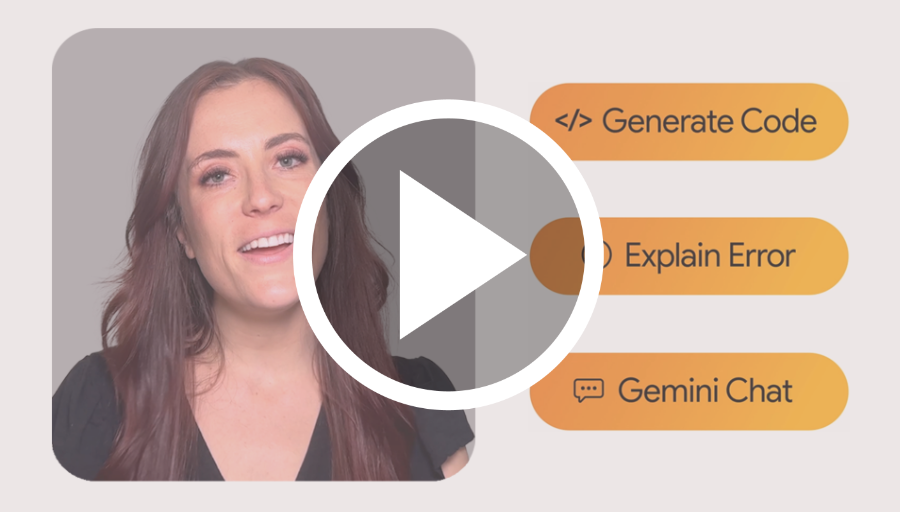
  </a>
</center>

<div class="markdown-google-sans">
  <h2>What is Colab?</h2>
</div>

Colab, or "Colaboratory", allows you to write and execute Python in your browser, with
- Zero configuration required
- Access to GPUs free of charge
- Easy sharing

Whether you're a **student**, a **data scientist** or an **AI researcher**, Colab can make your work easier. Watch [Introduction to Colab](https://www.youtube.com/watch?v=inN8seMm7UI) or [Colab Features You May Have Missed](https://www.youtube.com/watch?v=rNgswRZ2C1Y) to learn more, or just get started below!

<div class="markdown-google-sans">

## **Getting started**
</div>

The document you are reading is not a static web page, but an interactive environment called a **Colab notebook** that lets you write and execute code.

For example, here is a **code cell** with a short Python script that computes a value, stores it in a variable, and prints the result:

In [ ]:
seconds_in_a_day = 24 * 60 * 60
seconds_in_a_day

86400

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells:

In [ ]:
seconds_in_a_week = 7 * seconds_in_a_day
seconds_in_a_week

604800

Colab notebooks allow you to combine **executable code** and **rich text** in a single document, along with **images**, **HTML**, **LaTeX** and more. When you create your own Colab notebooks, they are stored in your Google Drive account. You can easily share your Colab notebooks with co-workers or friends, allowing them to comment on your notebooks or even edit them. To learn more, see [Overview of Colab](/notebooks/basic_features_overview.ipynb). To create a new Colab notebook you can use the File menu above, or use the following link: [create a new Colab notebook](http://colab.research.google.com#create=true).

Colab notebooks are Jupyter notebooks that are hosted by Colab. To learn more about the Jupyter project, see [jupyter.org](https://www.jupyter.org).

<div class="markdown-google-sans">

## Data science
</div>

With Colab you can harness the full power of popular Python libraries to analyze and visualize data. The code cell below uses **numpy** to generate some random data, and uses **matplotlib** to visualize it. To edit the code, just click the cell and start editing.

You can import your own data into Colab notebooks from your Google Drive account, including from spreadsheets, as well as from Github and many other sources. To learn more about importing data, and how Colab can be used for data science, see the links below under [Working with Data](#working-with-data).

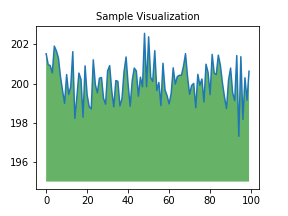

In [ ]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

ys = 200 + np.random.randn(100)
x = [x for x in range(len(ys))]

fig = plt.figure(figsize=(4, 3), facecolor='w')
plt.plot(x, ys, '-')
plt.fill_between(x, ys, 195, where=(ys > 195), facecolor='g', alpha=0.6)
plt.title("Sample Visualization", fontsize=10)

data = io.BytesIO()
plt.savefig(data)
image = F"data:image/png;base64,{base64.b64encode(data.getvalue()).decode()}"
alt = "Sample Visualization"
display.display(display.Markdown(F"""![{alt}]({image})"""))
plt.close(fig)

Colab notebooks execute code on Google's cloud servers, meaning you can leverage the power of Google hardware, including [GPUs and TPUs](#using-accelerated-hardware), regardless of the power of your machine. All you need is a browser.

For example, if you find yourself waiting for **pandas** code to finish running and want to go faster, you can switch to a GPU Runtime and use libraries like [RAPIDS cuDF](https://rapids.ai/cudf-pandas) that provide zero-code-change acceleration.

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

<div class="markdown-google-sans">

## Machine learning
</div>

With Colab you can import an image dataset, train an image classifier on it, and evaluate the model, all in just [a few lines of code](https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb).

Colab is used extensively in the machine learning community with applications including:
- Getting started with TensorFlow
- Developing and training neural networks
- Experimenting with TPUs
- Disseminating AI research
- Creating tutorials

To see sample Colab notebooks that demonstrate machine learning applications, see the [machine learning examples](#machine-learning-examples) below.

<div class="markdown-google-sans">

## More Resources

### Working with Notebooks in Colab

</div>

- [Overview of Colab](/notebooks/basic_features_overview.ipynb)
- [Guide to Markdown](/notebooks/markdown_guide.ipynb)
- [Importing libraries and installing dependencies](/notebooks/snippets/importing_libraries.ipynb)
- [Saving and loading notebooks in GitHub](https://colab.research.google.com/github/googlecolab/colabtools/blob/main/notebooks/colab-github-demo.ipynb)
- [Interactive forms](/notebooks/forms.ipynb)
- [Interactive widgets](/notebooks/widgets.ipynb)

<div class="markdown-google-sans">

<a name="working-with-data"></a>
### Working with Data
</div>

- [Loading data: Drive, Sheets, and Google Cloud Storage](/notebooks/io.ipynb)
- [Charts: visualizing data](/notebooks/charts.ipynb)
- [Getting started with BigQuery](/notebooks/bigquery.ipynb)

<div class="markdown-google-sans">

### Machine Learning Crash Course

<div>

These are a few of the notebooks from Google's online Machine Learning course. See the [full course website](https://developers.google.com/machine-learning/crash-course/) for more.
- [Intro to Pandas DataFrame](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb)
- [Intro to RAPIDS cuDF to accelerate pandas](https://nvda.ws/rapids-cudf)
- [Linear regression with tf.keras using synthetic data](https://colab.research.google.com/github/google/eng-edu/blob/main/ml/cc/exercises/linear_regression_with_synthetic_data.ipynb)

<div class="markdown-google-sans">

<a name="using-accelerated-hardware"></a>
### Using Accelerated Hardware
</div>

- [TensorFlow with GPUs](/notebooks/gpu.ipynb)
- [TensorFlow with TPUs](/notebooks/tpu.ipynb)

<div class="markdown-google-sans">

<a name="machine-learning-examples"></a>

### Featured examples

</div>

- [Retraining an Image Classifier](https://tensorflow.org/hub/tutorials/tf2_image_retraining): Build a Keras model on top of a pre-trained image classifier to distinguish flowers.
- [Text Classification](https://tensorflow.org/hub/tutorials/tf2_text_classification): Classify IMDB movie reviews as either *positive* or *negative*.
- [Style Transfer](https://tensorflow.org/hub/tutorials/tf2_arbitrary_image_stylization): Use deep learning to transfer style between images.
- [Multilingual Universal Sentence Encoder Q&A](https://tensorflow.org/hub/tutorials/retrieval_with_tf_hub_universal_encoder_qa): Use a machine learning model to answer questions from the SQuAD dataset.
- [Video Interpolation](https://tensorflow.org/hub/tutorials/tweening_conv3d): Predict what happened in a video between the first and the last frame.


In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [9]:

# File path for the dataset
file_path = '/content/student-mat.csv'

# Load the dataset
data = pd.read_csv(file_path)

# Define the numerical columns for clustering (based on your dataset structure)
numerical_columns = [
    'age', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime',
    'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3'
]

# Standardize the dataset
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Convert scaled data back to a DataFrame for analysis (optional)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Display the scaled DataFrame (optional)
print(scaled_df.head())


        age  traveltime  studytime  failures    famrel  freetime     goout  \
0  1.023046    0.792251  -0.042286 -0.449944  0.062194 -0.236010  0.801479   
1  0.238380   -0.643249  -0.042286 -0.449944  1.178860 -0.236010 -0.097908   
2 -1.330954   -0.643249  -0.042286  3.589323  0.062194 -0.236010 -0.997295   
3 -1.330954   -0.643249   1.150779 -0.449944 -1.054472 -1.238419 -0.997295   
4 -0.546287   -0.643249  -0.042286 -0.449944  0.062194 -0.236010 -0.997295   

       Dalc      Walc    health  absences        G1        G2        G3  
0 -0.540699 -1.003789 -0.399289  0.036424 -1.782467 -1.254791 -0.964934  
1 -0.540699 -1.003789 -0.399289 -0.213796 -1.782467 -1.520979 -0.964934  
2  0.583385  0.551100 -0.399289  0.536865 -1.179147 -0.722415 -0.090739  
3 -0.540699 -1.003789  1.041070 -0.464016  1.234133  0.874715  1.002004  
4 -0.540699 -0.226345  1.041070 -0.213796 -1.480807 -0.190038 -0.090739  


Cluster Means:
                       age  traveltime  studytime  failures    famrel  \
KMeans_Cluster                                                         
0               16.462025    1.297468   2.221519  0.088608  3.974684   
1               16.758621    1.462069   2.048276  0.455172  3.972414   
2               17.000000    1.684783   1.695652  0.565217  3.847826   

                freetime     goout      Dalc      Walc    health  absences  \
KMeans_Cluster                                                               
0               3.139241  2.696203  1.120253  1.746835  3.462025  4.474684   
1               3.027586  2.958621  1.151724  1.820690  3.386207  5.703448   
2               3.728261  4.054348  2.619565  3.967391  3.978261  7.836957   

                       G1         G2         G3  
KMeans_Cluster                                   
0               13.854430  13.860759  14.113924  
1                8.262069   7.786207   6.793103  
2               10.021739   9.92

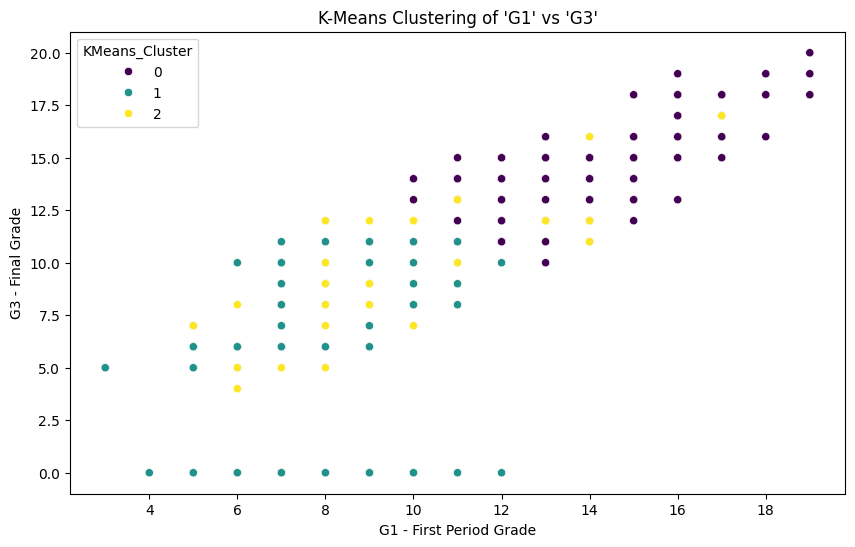

In [10]:
# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['KMeans_Cluster'] = kmeans.fit_predict(scaled_data)

# Cluster Means Analysis
cluster_means = data.groupby('KMeans_Cluster')[numerical_columns].mean()
print("Cluster Means:\n", cluster_means)

# Visualizing K-Means Clusters (using 'G1' vs 'G3')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='G1', y='G3', hue='KMeans_Cluster', palette='viridis')
plt.title("K-Means Clustering of 'G1' vs 'G3'")
plt.xlabel("G1 - First Period Grade")
plt.ylabel("G3 - Final Grade")
plt.show()

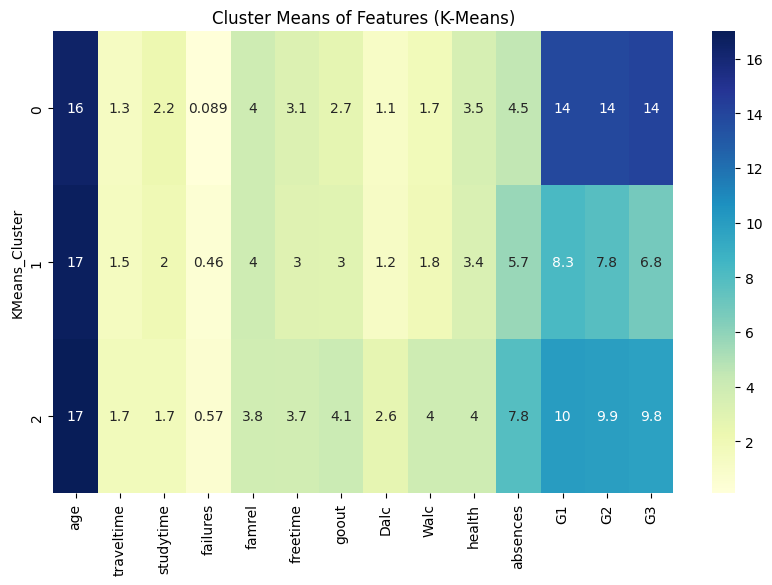

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu")
plt.title("Cluster Means of Features (K-Means)")
plt.show()

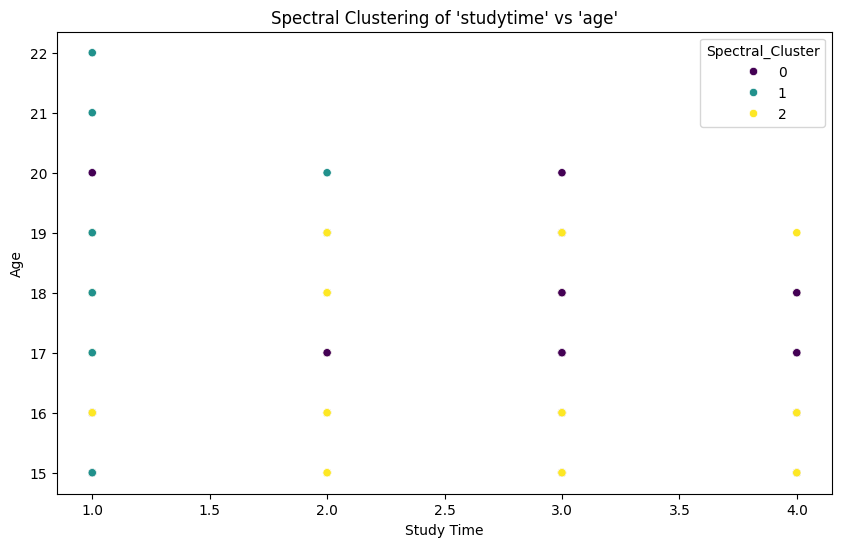

In [12]:
# Perform Spectral Clustering
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', random_state=42)
data['Spectral_Cluster'] = spectral.fit_predict(scaled_data)

# Visualizing Spectral Clustering (using 'studytime' vs 'age')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='studytime', y='age', hue='Spectral_Cluster', palette='viridis')
plt.title("Spectral Clustering of 'studytime' vs 'age'")
plt.xlabel("Study Time")
plt.ylabel("Age")
plt.show()

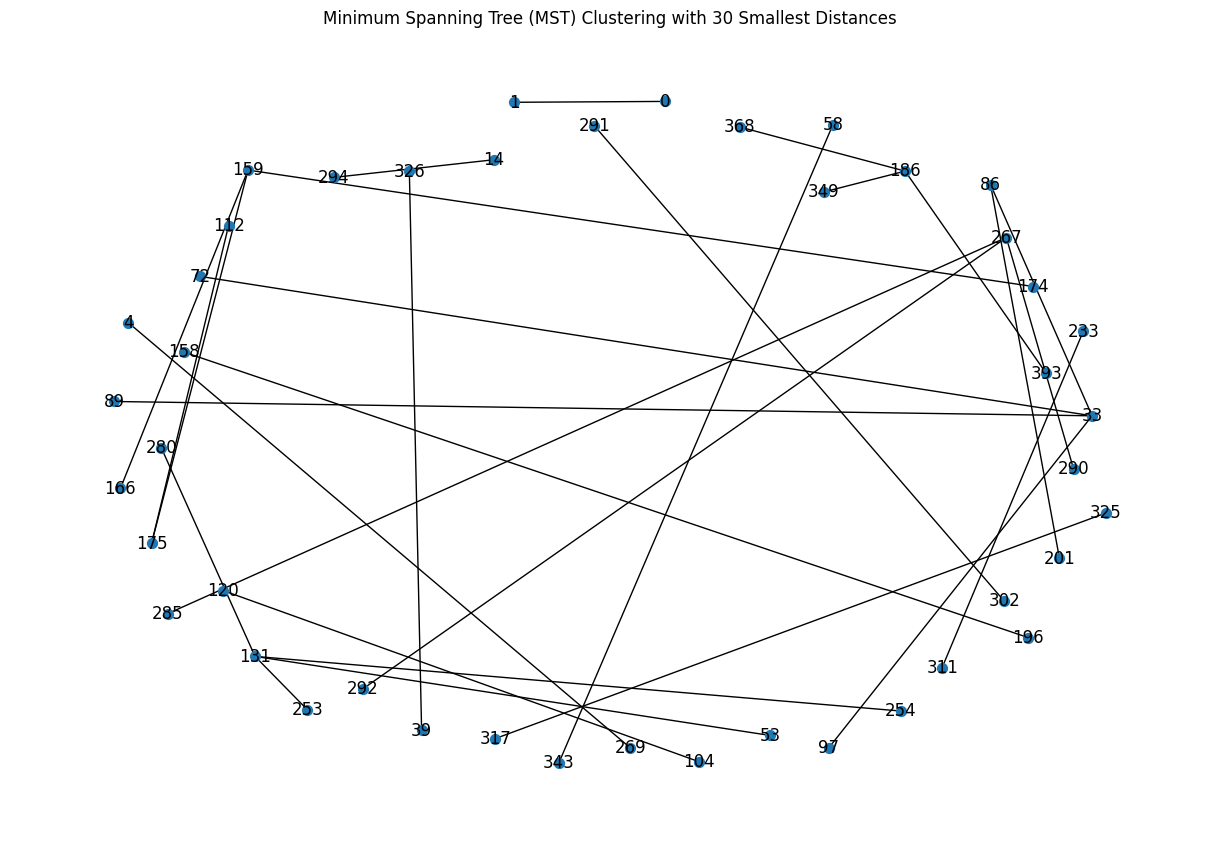

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances

# Compute pairwise distances between selected numerical columns (studytime, G1)
selected_columns = ['studytime', 'G1']
distances = euclidean_distances(data[selected_columns])

# Flatten the distance matrix and get the indices of the smallest 30 distances
distances_flat = distances[np.triu_indices(len(distances), k=1)]  # Get upper triangular part to avoid duplicates
sorted_indices = np.argsort(distances_flat)[:30]  # Get indices of the 30 smallest distances

# Create the graph for MST & Computing it (using the smallest 30 distances)
G = nx.Graph()
for idx in sorted_indices:
    i, j = np.triu_indices(len(distances), k=1)[0][idx], np.triu_indices(len(distances), k=1)[1][idx]
    G.add_edge(i, j, weight=distances[i][j])

# Compute the MST
mst = nx.minimum_spanning_tree(G)

# Visualize the MST structure
plt.figure(figsize=(12, 8))
nx.draw(mst, with_labels=True, node_size=50, font_size=12)
plt.title("Minimum Spanning Tree (MST) Clustering with 30 Smallest Distances")
plt.show()


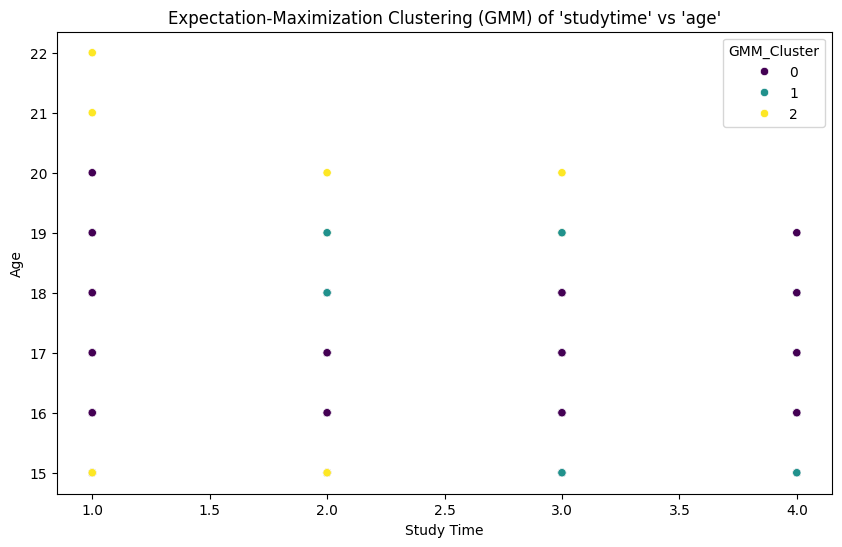

In [23]:
# Fit the GMM model with 3 clusters
gmm = GaussianMixture(n_components=3, random_state=42)
data['GMM_Cluster'] = gmm.fit_predict(scaled_data)

# Visualize the GMM clusters using 'studytime' vs 'age'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='studytime', y='age', hue='GMM_Cluster', palette='viridis')
plt.title("Expectation-Maximization Clustering (GMM) of 'studytime' vs 'age'")
plt.xlabel("Study Time")
plt.ylabel("Age")
plt.show()

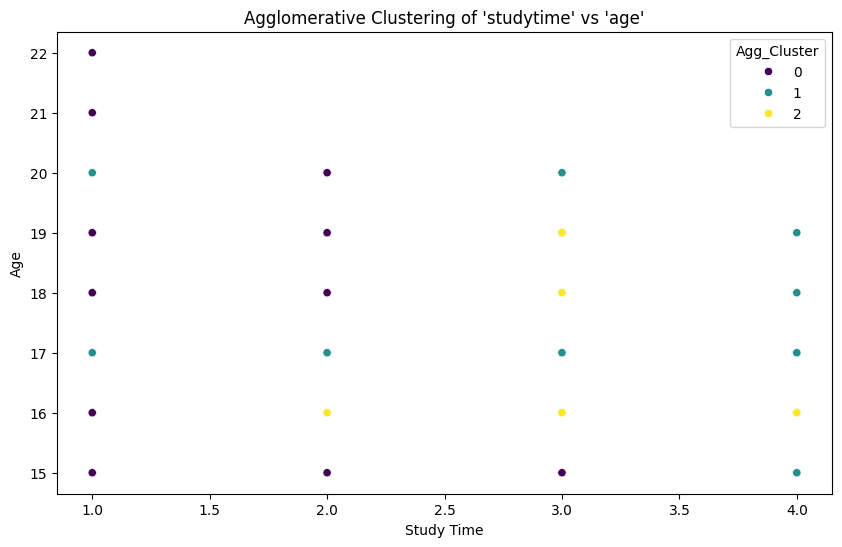

In [24]:
# Fit the Agglomerative Clustering model with 3 clusters
agg_clustering = AgglomerativeClustering(n_clusters=3)
data['Agg_Cluster'] = agg_clustering.fit_predict(scaled_data)

# Visualize the Agglomerative Clustering using 'studytime' vs 'age'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='studytime', y='age', hue='Agg_Cluster', palette='viridis')
plt.title("Agglomerative Clustering of 'studytime' vs 'age'")
plt.xlabel("Study Time")
plt.ylabel("Age")
plt.show()

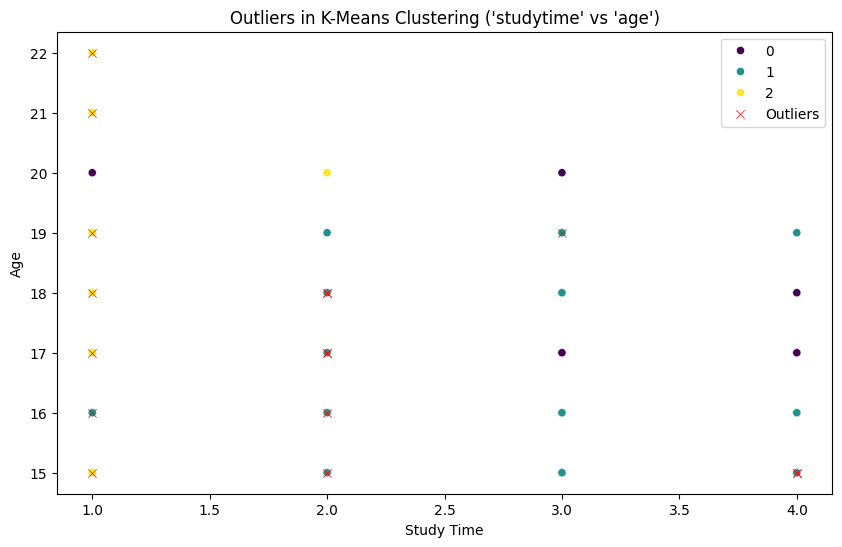

In [25]:
# Calculate distances to the centroid
distances_to_centroid = kmeans.transform(scaled_data).min(axis=1)

# Set the outlier threshold (mean + 2 * std deviation)
outlier_threshold = distances_to_centroid.mean() + 2 * distances_to_centroid.std()

# Identify the outliers based on the threshold
outliers = data[distances_to_centroid > outlier_threshold]

# Visualizing the outliers in the context of 'studytime' vs 'age'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='studytime', y='age', hue='KMeans_Cluster', palette='viridis')
sns.scatterplot(data=outliers, x='studytime', y='age', color='red', marker='x', label='Outliers')
plt.title("Outliers in K-Means Clustering ('studytime' vs 'age')")
plt.xlabel("Study Time")
plt.ylabel("Age")
plt.legend()
plt.show()